# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [1]:
!pip install tensorflow
!pip install keras

Empezamos importando librerías

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [5]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [6]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

In [ ]:
!pip install sklearn

In [12]:
!pip install matplotlib

  Using cached matplotlib-3.5.2-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached kiwisolver-1.4.3-cp39-cp39-win_amd64.whl (55 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'C:\\Users\\josel\\anaconda3\\envs\\taller_ds\\Lib\\site-packages\\matplotlib\\testing\\widgets.py'
Consider using the `--user` option or check the permissions.



C:\Users\Ort\AppData\Local\Temp\ipykernel_27404\3096108358.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


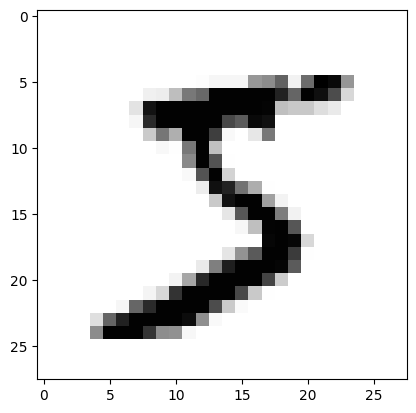

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [9]:
X_train.max()

255

In [10]:
X_train.min()

0

In [7]:
0/255

0.0

In [8]:
128/255

0.5019607843137255

In [9]:
255/255

1.0

In [11]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [17]:
np.mean(X_train)

0.13066062

In [11]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [12]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [13]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [31]:
model = keras.models.Sequential()


In [32]:


# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 150,
                            activation='relu'))

model.add(keras.layers.Dropout(0.30))

# Hidden layer
model.add(keras.layers.Dense(units = 50,
                            activation='relu'))
model.add(keras.layers.Dropout(0.30))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

c:\Users\Ort\miniconda3\envs\basic_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Podemos ver las capas, y acceder a sus elementos

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

Establecemos la configuración de ejecución... el compile.

In [33]:
# Equivalente
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [34]:
# Summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,810 (491.45 KB)

 Trainable params: 125,810 (491.45 KB)

 Non-trainable params: 0 (0.00 B)

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [35]:
X_train.shape

(50000, 28, 28)

In [36]:
50000/128

390.625

In [38]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0817 - val_accuracy: 0.9775 - val_loss: 0.0774
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9752 - loss: 0.0809 - val_accuracy: 0.9773 - val_loss: 0.0802
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9766 - loss: 0.0785 - val_accuracy: 0.9798 - val_loss: 0.0757
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0748 - val_accuracy: 0.9788 - val_loss: 0.0782
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: 0.0704 - val_accuracy: 0.9798 - val_loss: 0.0746
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9783 - loss: 0.0688 - val_accuracy: 0.9791 - val_loss: 0.0770
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9805 - loss: 0.0645 - val_accuracy: 0.9787 - val_loss: 0.0744
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9802 - loss: 0.0636 - val_accuracy: 0.

In [41]:
predictions = model.predict(X_test)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step


array([[1.9879279e-13, 7.5335439e-11, 1.4094606e-10, ..., 1.0000000e+00,
        5.2530727e-12, 1.7300904e-08],
       [2.3214900e-11, 4.7749668e-04, 9.9951971e-01, ..., 7.1901431e-09,
        2.0423688e-10, 4.0333597e-16],
       [2.8353600e-10, 9.9999869e-01, 3.1750137e-08, ..., 1.0147963e-06,
        3.4420495e-08, 5.2043900e-11],
       ...,
       [4.1583256e-17, 2.5648160e-15, 2.5386616e-14, ..., 9.0243472e-11,
        1.2026504e-12, 2.9834331e-07],
       [3.9586365e-16, 8.8912612e-17, 1.4945130e-18, ..., 4.7747148e-17,
        1.0111183e-07, 2.2405423e-13],
       [7.7334673e-11, 3.0106539e-16, 2.3292236e-12, ..., 6.5749847e-19,
        1.8364265e-13, 1.2838906e-19]], dtype=float32)

In [44]:
predictions = np.argmax(predictions, axis=1)

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 970,    1,    0,    1,    0,    1,    4,    1,    1,    1],
       [   0, 1130,    2,    0,    0,    1,    2,    0,    0,    0],
       [   2,    2, 1013,    3,    2,    0,    2,    6,    2,    0],
       [   0,    0,    3,  995,    0,    3,    0,    4,    5,    0],
       [   1,    0,    1,    0,  963,    0,    6,    3,    0,    8],
       [   2,    1,    0,   12,    1,  866,    3,    0,    4,    3],
       [   1,    2,    0,    1,    6,    3,  944,    0,    1,    0],
       [   0,    8,    7,    5,    0,    0,    0, 1002,    2,    4],
       [   3,    0,    2,    5,    5,    6,    1,    4,  945,    3],
       [   3,    3,    0,    5,   13,    1,    0,    8,    2,  974]],
      dtype=int64)

In [48]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.9763 - loss: 0.0870


[0.07475820928812027, 0.9801999926567078]

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [36]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0824 - accuracy: 0.9774 - val_loss: 0.1075 - val_accuracy: 0.9697
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0795 - accuracy: 0.9786 - val_loss: 0.1035 - val_accuracy: 0.9714
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0767 - accuracy: 0.9796 - val_loss: 0.1019 - val_accuracy: 0.9712
Epoch 4/10
782/782 [==============================] - 8s 11ms/step - loss: 0.0738 - accuracy: 0.9805 - val_loss: 0.1002 - val_accuracy: 0.9721
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0711 - accuracy: 0.9812 - val_loss: 0.1050 - val_accuracy: 0.9709
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0689 - accuracy: 0.9816 - val_loss: 0.0974 - val_accuracy: 0.9722
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0664 - accuracy: 0.9825 - val_loss: 0.0976 - val_accuracy: 0.9729
E

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [37]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 50, 'steps': 391}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


{'loss': [1.2606432437896729,
  0.5073379874229431,
  0.3963316082954407,
  0.35093870759010315,
  0.32315966486930847,
  0.30234017968177795,
  0.2859199047088623,
  0.27146896719932556,
  0.25876107811927795,
  0.2474210113286972,
  0.23700228333473206,
  0.22742919623851776,
  0.2186262160539627,
  0.2104661762714386,
  0.20308594405651093,
  0.19585661590099335,
  0.18922550976276398,
  0.18290522694587708,
  0.17689797282218933,
  0.171352818608284,
  0.16615021228790283,
  0.16110429167747498,
  0.15645083785057068,
  0.15189804136753082,
  0.14749477803707123,
  0.14359557628631592,
  0.13974981009960175,
  0.13580283522605896,
  0.13239270448684692,
  0.12896263599395752,
  0.12570436298847198,
  0.1226966604590416,
  0.1198044940829277,
  0.1169242113828659,
  0.11425230652093887,
  0.11159147322177887,
  0.1089780256152153,
  0.10655452311038971,
  0.1041840985417366,
  0.10169029235839844,
  0.09966576844453812,
  0.09765546023845673,
  0.09557442367076874,
  0.0936978235840

In [42]:
history.history

{'loss': [0.06225531920790672,
  0.06138444319367409,
  0.06027477979660034,
  0.059108540415763855,
  0.058218587189912796,
  0.05721678584814072,
  0.05623963847756386,
  0.055387239903211594,
  0.05441601574420929,
  0.05352767929434776,
  0.052592288702726364,
  0.051786866039037704,
  0.05093264952301979,
  0.05003897473216057,
  0.0492832325398922,
  0.04847511276602745,
  0.04775787517428398,
  0.04693999141454697,
  0.046214886009693146,
  0.045556679368019104,
  0.04481605067849159,
  0.04405045881867409,
  0.04339233413338661,
  0.04278245195746422,
  0.042025357484817505,
  0.041410598903894424,
  0.040810007601976395,
  0.04007289931178093,
  0.03942100703716278,
  0.03892222046852112],
 'accuracy': [0.9837200045585632,
  0.9840800166130066,
  0.983959972858429,
  0.9847999811172485,
  0.9847999811172485,
  0.9850999712944031,
  0.9853399991989136,
  0.9857400059700012,
  0.986020028591156,
  0.9861599802970886,
  0.9864799976348877,
  0.9866200089454651,
  0.98703998327255

In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.185969,0.71750,0.580700,0.8669
1,0.506999,0.87242,0.390600,0.8978
2,0.396309,0.89220,0.331955,0.9103
3,0.349226,0.90234,0.302923,0.9146
4,0.320345,0.90868,0.281495,0.9231
5,0.298978,0.91518,0.264784,0.9266
6,0.282174,0.92004,0.252360,0.9280
7,0.267849,0.92370,0.243314,0.9307
8,0.255327,0.92746,0.233507,0.9346
9,0.244182,0.93136,0.223619,0.9368


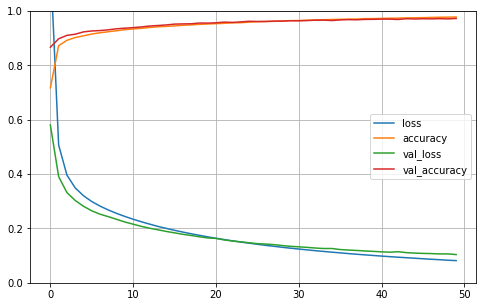

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [38]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 2s 6ms/step - loss: 0.0884 - accuracy: 0.9739


[0.08835859596729279, 0.9739000201225281]

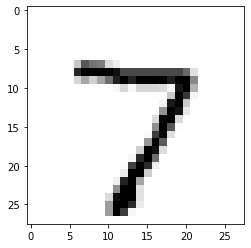

In [39]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [53]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [40]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

(1, 10)


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ]], dtype=float32)

In [58]:
predictions.argmax()

7

In [41]:
model.predict(X_test).argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

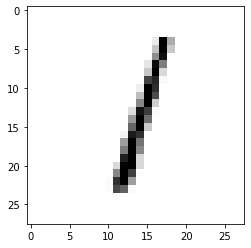

In [62]:
plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [46]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [44]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [45]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [49]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [50]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [51]:
X_train.shape[1:]

(8,)

In [52]:
model = keras.models.Sequential()
#     [
#     keras.layers.Dense(30, activation = 'relu',
#                       input_shape = X_train.shape[1:]),
    
# ])

model.add(keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(1))

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 7ms/step - loss: 1.0061 - val_loss: 24.4933
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.8189 - val_loss: 0.5414
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4385 - val_loss: 0.4768
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4128 - val_loss: 0.4503
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3955 - val_loss: 0.4673
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5451 - val_loss: 0.4395
Epoch 7/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4031 - val_loss: 0.4473
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3943 - val_loss: 0.4177
Epoch 9/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3790 - val_loss: 0.4051
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3770 - val_loss: 0.405

In [53]:
8*30 + 30

270

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [55]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3471
0.3471486568450928


In [56]:
y_pred = model.predict(X_test[:5])
y_pred

array([[2.7218366 ],
       [2.564496  ],
       [3.007024  ],
       [1.4103477 ],
       [0.81153166]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [75]:
model.save("my_keras_model.h5")

In [76]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [77]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3521
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3497
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3485
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3465
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3451
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3440
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3422A: 0s - los
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3408
Epoch 9/30
219/363 [=================>............] - ETA: 0s - loss: 0.3336

KeyboardInterrupt: 

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [80]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                    validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3196 - val_loss: 0.3466
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3189 - val_loss: 0.3454
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3185 - val_loss: 0.3499
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3199 - val_loss: 0.3597
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3310 - val_loss: 0.3491
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3363 - val_loss: 0.3487
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3239 - val_loss: 0.3462
